Aim: Implement CNN for MNIST dataset using tensorflow 

In [1]:
! pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.36.2 which is incompatible.



  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/375.7 MB 1.5 MB/s eta 0:04:07
   ---------------------------------------- 1.3/375.7 MB 2.0 MB/s eta 0:

In [2]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:

# Step 2: Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Step 3: Preprocess the data
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
# Step 4: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

c:\python 3.10\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.8917 - loss: 0.3574 - val_accuracy: 0.9865 - val_loss: 0.0494
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.9875 - val_loss: 0.0444
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 30ms/step - accuracy: 0.9886 - loss: 0.0358 - val_accuracy: 0.9878 - val_loss: 0.0434
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.9863 - val_loss: 0.0460
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 23ms/step - accuracy: 0.9949 - loss: 0.0167 - val_accuracy: 0.9903 - val_loss: 0.0390


In [12]:

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy:", test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9869 - loss: 0.0352

Test accuracy: 99.04000163078308


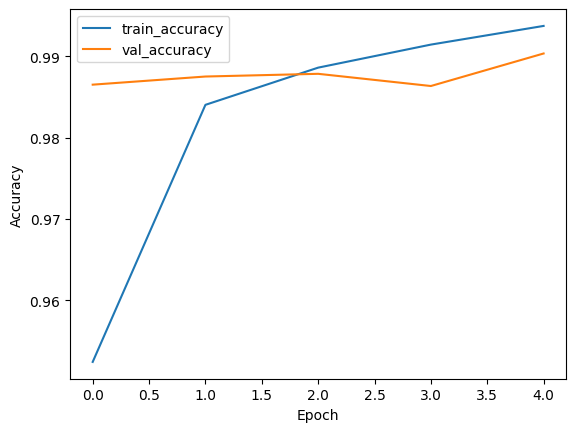

In [ ]:
# Step 8: Plot training history 
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
